In [1]:
#for 20_genes
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/MLP/max_contri_20_names_df.csv'
nfm_layer_20_path='results_genes/NFM_layer_2/contri_20_names_df_max.csv'


mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/intersecions_20_df_max.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
    
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)

        # 求交集
        intersection = mlp_set.intersection(nfm_set)

        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['SNRPA', 'ADRA2B', 'ABCB8', 'ELF4', 'MFSD11', 'CLIC4', 'ATP6V0E2', 'PPFIBP2', 'CRYL1', 'AHCYL2', 'NNAT', 'SEPHS1']
intersecion_list: ['HIGD1A', 'PCF11', 'MAB21L4', 'RHOC', 'AAGAB', 'GATM', 'AGMAT', 'CREB3L2', 'PSMB1', 'RGN', 'ASNS']
intersecion_list: ['ACSF2', 'FADS2', 'ACVR2A', 'AFTPH', 'PSMB5', 'PIK3C2B', 'SMO', 'MED18', 'ASXL2', 'EBP', 'ACTB', 'KIF1B', 'XPO6', 'LDHB', 'SETDB1']
intersecion_list: ['HIGD1A', 'VTI1B', 'ZCCHC14', 'NDUFAF3', 'GATM', 'GPX3', 'PIGH', 'RPL5', 'ATP6V0E2', 'RHCG', 'ABCB6']
intersecion_list: ['RAB3IL1', 'AFTPH', 'SNRPA', 'ACAD8', 'GLB1L', 'STX17', 'CCNC', 'ASXL2', 'SGF29', 'GPX3', 'MFSD11', 'ACE2', 'CHAF1A', 'PLA2G2A']
intersecion_list: ['ZPR1', 'HP', 'GM2A', 'CHAF1A', 'TSPAN15', 'MKRN2', 'IFT20', 'CLIC4', 'FSCN3', 'SEPHS1']
intersecion_list: ['RPS21', 'ACAD8', 'PDGFC', 'ABHD3', 'SLC25A36', 'SLCO4C1', 'FDX1', 'ADIPOR1', 'KNOP1', 'PPP6R3', 'ENTR1', 'METTL22', 'PFKP', 'ABLIM3', 'MRPL13']
intersecion_list: ['ANGEL2', 'ADH5', 'THRA', 'SLC39A1', 

In [2]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/intersecions_20_df_max.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/genes_intersections_20_max.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/max_train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/max_test_info.csv')



91
columns: ['ANGEL2', 'ACSF2', 'HIGD1A', 'PIK3C2B', 'SOX21', 'MAB21L4', 'ASXL2', 'ALCAM', 'ACTB', 'AGMAT', 'ABCB6', 'MKRN2', 'PLA2G2A', 'THRA', 'PIGH', 'RHCG', 'ACE2', 'ABCC4', 'IFT20', 'LDHB', 'FSCN3', 'MRPL13', 'ADRA2B', 'DLG1', 'PSMB9', 'SGF29', 'GPX3', 'MFSD11', 'KIF1B', 'ATP6V0E2', 'SEPHS1', 'CLIC4', 'NNAT', 'AHCYL2', 'ZPR1', 'PCF11', 'MED18', 'CCNC', 'PPP6R3', 'DNASE1L3', 'YARS', 'PSMB1', 'ASNS', 'AFTPH', 'FADS2', 'GLB1L', 'ACAD8', 'SLC25A36', 'ZCCHC14', 'KNOP1', 'LINC01565', 'ABCB8', 'ELF4', 'NDUFAF3', 'ENTR1', 'GM2A', 'RPL5', 'CREB3L2', 'TSPAN15', 'RAB3IL1', 'SNRPA', 'PDGFC', 'PSMB5', 'SLCO4C1', 'FDX1', 'STX17', 'SMO', 'GATM', 'XPO6', 'PFKP', 'ZBTB7B', 'ABLIM3', 'SETDB1', 'RPS21', 'ADH5', 'VTI1B', 'ADIPOR1', 'RHOC', 'HP', 'ABHD3', 'ACVR2A', 'SLC39A1', 'UBE2Z', 'AAGAB', 'EBP', 'SDC4', 'METTL22', 'CHAF1A', 'PPFIBP2', 'CRYL1', 'RGN', 'label']
(549, 92)
(138, 92)


In [5]:
import torch
import Trainer
from network import NFM
import torch.utils.data as Data
from Utils.criteo_loader import getTestData, getTrainData

nfm_config = \
{
    'n_class':9,
    'linear_hidden1':2000,
    #'linear_hidden':100,#线性模型输出层（隐层个数）
    #'embed_input_dim':1001,#embed输入维度
    #'embed_dim': 100, # 用于控制稀疏特征经过Embedding层后的稠密特征大小，embed输出维度
    #'dnn_hidden_units': [100,11],#MLP隐层和输出层
    
    'dnn_hidden_units':[100,9],#MLP隐层
    'num_sparse_features_cols':10477,#the number of the gene columns
    'num_dense_features': 0,#dense features number
    'bi_dropout': 0.5,#Bi-Interaction 的dropout
    'num_epoch': 500,#训练epoch次数
    'batch_size': 16,#batch_size
    'lr': 1e-3,
    'l2_regularization': 1e-4,
    'device_id': 0,
    'use_cuda': False,
    'epoch':1000,
    
    #'train_file': '../Data/criteo/processed_data/train_set.csv',
    #'fea_file': '../Data/criteo/processed_data/fea_col.npy',
    #'validate_file': '../Data/criteo/processed_data/val_set.csv',
    #'test_file': '../Data/criteo/processed_data/test_set.csv',
    #'model_name': '../TrainedModels/NFM.model'
    #'train_file':'data/xiaoqiu_gene_5000/train/final_5000_encode_100x.csv',
    #'train_data':'dataset/qiuguan/encode/encode_1000/train/train_encode_data_1000_new.csv',
    #'train_label':'dataset/qiuguan/non_code/train/train_label.csv',
    #'guan_test_data':'dataset/qiuguan/non_code/guan_test/guan_test_data.csv',
    #'guan_test_label':'dataset/qiuguan/non_code/guan_test/guan_test_label.csv',
    #'test_data':'dataset/qiuguan/encode/encode_1000/test/test_encode_data_1000_new.csv',
    #'test_label':'dataset/qiuguan/non_code/test/test_labels.csv',
    #'title':'dataset/xiaoguan/RF/RF_for_train/train_class_9/test/test_data.csv',
    
    #'all':''
    #'title':'data/xiaoqiu_gene_5000/train/gene_5000_gene_name.csv',
    #'all':'data/xiaoqiu_gene_5000/train/gene_5000_label_name.csv'
}

#model definition
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(3300)
        self.fc1 = nn.Linear(3300, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model = MLP().cuda()
print(model)

class MLP1(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(237)
        self.fc1 = nn.Linear(237, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model1 = MLP1().cuda()
print(model1)
class MLP2(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(91)
        self.fc1 = nn.Linear(91, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model2 = MLP2().cuda()
print(model2)
import os
import time
import argparse
import numpy as np
import pandas as pd 

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import torch.nn.functional as F  # 激励函数的库
#import network
import config
import evaluate
import data_utils
#import Trainer



def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    #n = len(labels)
    n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output

def one_hot(labels, classes):
    n = len(labels)
    #eoff = label_smoothing / classes
    output = np.zeros((n, classes), dtype=np.float32)
    for row, label in enumerate(labels):
        output[row, label] = 1
        #print("row:",row,"label:",label)
    return output


def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    #n = len(labels)
    n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output

def one_hot(labels, classes):
    n = len(labels)
    #eoff = label_smoothing / classes
    output = np.zeros((n, classes), dtype=np.float32)
    for row, label in enumerate(labels):
        output[row, label] = 1
        #print("row:",row,"label:",label)
    return output



class KZDatasetPredict(data.Dataset):
    """ Construct the FM pytorch dataset. """
    #def __init__(self, file,label_file, feature_map,n_class=16):
    def __init__(self, df_list):
    
       
        self.data_info = self.get_data_info(df_list)
        
        
            
        
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data,label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data,label

    def __len__(self):
        return len(self.data_info)
   
    
    
    def get_data_info(self,df_list):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        print('data_info:',df_list[-1])
        #df=pd.read_csv(csv_path,sep=',')
        #df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        label=int(df_list[-1])
        labels.append(label)
        print('labels:',labels)
        data=df_list[:-1]
        #df_np=np.array(df_list)
        #print(rows,cols)
        
        #print('labels:',labels)
        labels=np.array(labels)
        print('labels.shape:',labels.shape)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        
           
        
        data=np.array(data)#
            
            
            
            
            
            
            
            
        data=torch.from_numpy(data)#
            
        labels=torch.from_numpy(labels)#
        #bi_data=embding_process(nfm_config,data)
        #print("bi_data.shape:",bi_data.shape)
            
            
        data_info.append((data,label))
        return data_info
class KZDatasetTest(data.Dataset):
    """ Construct the FM pytorch dataset. """
    #def __init__(self, file,label_file, feature_map,n_class=16):
    def __init__(self, csv_path):
    
       
        self.data_info = self.get_data_info(csv_path)
        
        
            
        
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data, label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data, label

    def __len__(self):
        return len(self.data_info)
   
    
    
    def get_data_info(self,csv_path):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        df=pd.read_csv(csv_path,sep=',')
        df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        rows,cols=df.shape
        print(rows,cols)
        for i in df.iloc[:,-1]:
            #print(i)
            labels.append(int(i))
        #print('labels:',labels)
        labels=np.array(labels)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        for i in range(rows):
            data=df.iloc[i,:-1]
            data=data.astype(float)#
            data=np.array(data)#
            
            label=labels[i]
            #print(data.shape)
            #print(label.shape)
            #label=label.tolist()
            data=torch.from_numpy(data)#
            label=torch.from_numpy(label)#
            
            
            data_info.append((data,label))
        return data_info
import torch
import torch.nn as nn
from torch.utils.data.dataset import *
from PIL import Image
from torch.nn import functional as F
import random
from sklearn.model_selection import train_test_split
import ast
import torchvision


        

class KZDataset(Dataset):
    def __init__(self, csv_path, K,n_class,ki=0, typ='train', transform=None, rand=False):
       
        self.all_data_info = self.get_data_info(csv_path)
        
        if rand:
            random.seed(1)
            random.shuffle(self.all_data_info)
        leng = len(self.all_data_info)
        every_z_len = leng // K
        if typ == 'val':
            self.data_info = self.all_data_info[every_z_len * ki : every_z_len * (ki+1)]
        elif typ == 'train':
            self.data_info = self.all_data_info[: every_z_len * ki] + self.all_data_info[every_z_len * (ki+1) :]
            
        self.transform = transform
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data, label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data, label

    def __len__(self):
        return len(self.data_info)
    
    
    
    def get_data_info(self,csv_path):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        df=pd.read_csv(csv_path,sep=',')
        df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        rows,cols=df.shape
        
        print(rows,cols)
        for i in df.iloc[:,-1]:
            #print(i)
            labels.append(int(i))
        #print('labels:',labels)
        labels=np.array(labels)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        for i in range(rows):
            data=df.iloc[i,:-1]
            data=data.astype(float)#
            data=np.array(data)#
            
            label=labels[i]
            #print(data.shape)
            #print(label.shape)
            #label=label.tolist()
            data=torch.from_numpy(data)#
            label=torch.from_numpy(label)#
            
            
            data_info.append((data,label))
        return data_info
            
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score
from new_nfm_network import NFM
import os
import time
import argparse
import numpy as np
import pandas as pd 
import sys

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import sys 
#import network
import config
import evaluate
import data_utils
import Trainer
import torchmetrics

from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score
from new_nfm_network import NFM
import os
import time
import argparse
import numpy as np
import pandas as pd 
import sys

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import sys 
#import network
import config
import evaluate
import data_utils
import Trainer
import torchmetrics


def train_epoch(model,train_loader,batch_size,optimizer,loss_func):
    BATCH_SIZE=batch_size
    total = 0
    correct=0
    total_loss=0
    #
    model.train()
    total_train_accuracy=0  
    for batch_idx, (x, labels) in enumerate(train_loader):
            
        labels = Variable(labels)
        x = Variable(x)
            
            
        x=torch.tensor(x,dtype=torch.float)
        labels=torch.tensor(labels,dtype=torch.float)
        x, labels = x.cuda(), labels.cuda()
        labels_int=labels=torch.max(labels,1)[1]
            
            
        optimizer.zero_grad()
        y_predict = model(x)
            
        loss = loss_func(y_predict, labels)
        loss.backward()
        optimizer.step()
            
        loss = loss.item()
           

        total_loss += loss
            
            
            
        batch_train_acc=torchmetrics.functional.accuracy(y_predict,labels_int)
        total_train_accuracy+=batch_train_acc
            
    total_train_accuracy/=(batch_idx+1)
    print('total_train_accuracy:',total_train_accuracy)
    print("Training Epoch: %d, total loss: %f" % (epoch_id, total_loss))
    return total_loss,total_train_accuracy

def val_epoch(model,test_loader,batch_size,optimizer): 
    batch_size_num=0
    total_test_acc=0
    model.eval()
    for i , (inputs , targets) in enumerate(test_loader):   
            print("test")
            
            inputs = Variable(inputs)   
            targets = Variable(targets)     
           
            inputs=torch.tensor(inputs ,dtype=torch.float)   
            targets=torch.tensor(targets ,dtype=torch.float)   
            inputs , targets = inputs.cuda(),  targets.cuda()   
            yhat = model(inputs)  
            
            
            
            targets=torch.max(targets,1)[1]
            
            
            
            batch_test_acc=torchmetrics.functional.accuracy(yhat,targets)
            
            total_test_acc+=batch_test_acc
            
            batch_size_num=i
    total_test_acc/=(batch_size_num+1)
        ###print('total_test_accuracy:',total_test_acc/(batch_size+1))
    print('total_test_accuracy:',total_test_acc)
        
                    
                    
            
            
    
        
   
    
    return total_test_acc


import numpy as np
import math
import matplotlib.pyplot as plt

def plotLoss(loss,epoch):
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(8, 5))
    x=[i for i in range(epoch)]
    #acc_train=acc_train.cpu()
    #acc_test=acc_test.cpu()
    plt.plot(x, loss, 'r-', mec='k', label='Logistic Loss', lw=2)
    #plt.plot(x,acc_train,'b-',mec='k',label='accuracy Train',lw=2)
    #plt.plot(x,acc_test,'g-',mec='k',label='accuracy Test',lw=2)
    #plt.plot(x, y_01, 'g-', mec='k', label='0/1 Loss', lw=2)
    #plt.plot(x, y_hinge, 'b-',mec='k', label='Hinge Loss', lw=2)
    #plt.plot(x, boost, 'm--',mec='k', label='Adaboost Loss',lw=2)
    plt.grid(True, ls='--')
    plt.legend(loc='upper right')
    plt.title('损失函数')
    plt.show()
 



MLP(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
MLP1(
  (bn0): BatchNorm1d(237, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=237, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (

549 92
549 92


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:450: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:451: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2396, device='cuda:0')
Training Epoch: 0, total loss: 64.256334
total_train_accuracy: tensor(0.3188, device='cuda:0')
Training Epoch: 1, total loss: 63.065863
total_train_accuracy: tensor(0.3667, device='cuda:0')
Training Epoch: 2, total loss: 62.164138
total_train_accuracy: tensor(0.3896, device='cuda:0')
Training Epoch: 3, total loss: 61.812037
total_train_accuracy: tensor(0.4417, device='cuda:0')
Training Epoch: 4, total loss: 61.241878
total_train_accuracy: tensor(0.4271, device='cuda:0')
Training Epoch: 5, total loss: 61.097105
total_train_accuracy: tensor(0.4792, device='cuda:0')
Training Epoch: 6, total loss: 60.508255
total_train_accuracy: tensor(0.4604, device='cuda:0')
Training Epoch: 7, total loss: 60.412703
total_train_accuracy: tensor(0.5146, device='cuda:0')
Training Epoch: 8, total loss: 59.599237
total_train_accuracy: tensor(0.5021, device='cuda:0')
Training Epoch: 9, total loss: 59.712038
total_train_accuracy: tensor(0.5458, device='cuda:

total_train_accuracy: tensor(0.6896, device='cuda:0')
Training Epoch: 86, total loss: 52.245835
total_train_accuracy: tensor(0.7271, device='cuda:0')
Training Epoch: 87, total loss: 51.132942
total_train_accuracy: tensor(0.7104, device='cuda:0')
Training Epoch: 88, total loss: 51.364946
total_train_accuracy: tensor(0.7208, device='cuda:0')
Training Epoch: 89, total loss: 51.214743
total_train_accuracy: tensor(0.7000, device='cuda:0')
Training Epoch: 90, total loss: 51.612561
total_train_accuracy: tensor(0.7146, device='cuda:0')
Training Epoch: 91, total loss: 51.476499
total_train_accuracy: tensor(0.7354, device='cuda:0')
Training Epoch: 92, total loss: 50.645171
total_train_accuracy: tensor(0.6958, device='cuda:0')
Training Epoch: 93, total loss: 51.984334
total_train_accuracy: tensor(0.7167, device='cuda:0')
Training Epoch: 94, total loss: 51.466239
total_train_accuracy: tensor(0.7333, device='cuda:0')
Training Epoch: 95, total loss: 50.801870
total_train_accuracy: tensor(0.7250, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


the  0  epoch ends


/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


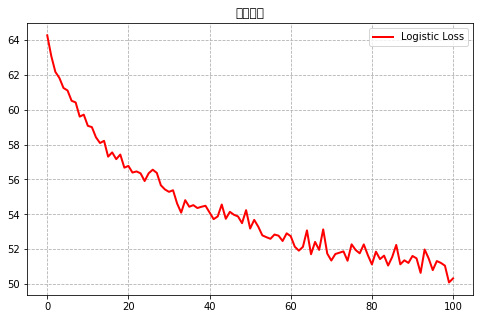

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:488: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:489: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
test
total_test_accuracy: tensor(0.6250, device='cuda:0')
acc_test_each_k: tensor(0.6250, device='cuda:0')
549 92
549 92
total_train_accuracy: tensor(0.7125, device='cuda:0')
Training Epoch: 0, total loss: 51.385326
total_train_accuracy: tensor(0.7229, device='cuda:0')
Training Epoch: 1, total loss: 50.935869
total_train_accuracy: tensor(0.7208, device='cuda:0')
Training Epoch: 2, total loss: 51.285947
total_train_accuracy: tensor(0.7313, device='cuda:0')
Training Epoch: 3, total loss: 50.585282
total_train_accuracy: tensor(0.7083, device='cuda:0')
Training Epoch: 4, total loss: 51.524264
total_train_accuracy: tensor(0.7229, device='cuda:0')
Training Epoch: 5, total loss: 51.026139
total_train_accuracy: tensor(0.7354, device='cuda:0')
Training Epoch: 6, total loss: 50.803782
total_train_accuracy: tensor(0.7458, device='cuda:0')
Training Epoch: 7, total loss: 50.424988
total_train_accuracy: tensor(0.7167, device='cuda:0')
Training Epoch: 8, total loss: 51.365121
total_train_ac

total_train_accuracy: tensor(0.7771, device='cuda:0')
Training Epoch: 85, total loss: 48.996024
total_train_accuracy: tensor(0.8042, device='cuda:0')
Training Epoch: 86, total loss: 48.414331
total_train_accuracy: tensor(0.7958, device='cuda:0')
Training Epoch: 87, total loss: 48.702934
total_train_accuracy: tensor(0.7542, device='cuda:0')
Training Epoch: 88, total loss: 49.365646
total_train_accuracy: tensor(0.7729, device='cuda:0')
Training Epoch: 89, total loss: 49.398914
total_train_accuracy: tensor(0.7792, device='cuda:0')
Training Epoch: 90, total loss: 48.749128
total_train_accuracy: tensor(0.7979, device='cuda:0')
Training Epoch: 91, total loss: 48.456197
total_train_accuracy: tensor(0.7917, device='cuda:0')
Training Epoch: 92, total loss: 48.902432
total_train_accuracy: tensor(0.7917, device='cuda:0')
Training Epoch: 93, total loss: 48.904904
total_train_accuracy: tensor(0.8042, device='cuda:0')
Training Epoch: 94, total loss: 48.529780
total_train_accuracy: tensor(0.7583, dev

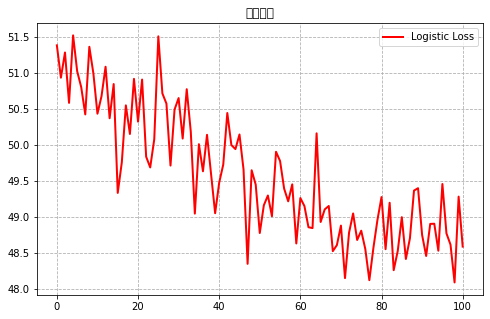

test
test
test
total_test_accuracy: tensor(0.7917, device='cuda:0')
acc_test_each_k: tensor(0.7917, device='cuda:0')
549 92
549 92
total_train_accuracy: tensor(0.7604, device='cuda:0')
Training Epoch: 0, total loss: 49.513873
total_train_accuracy: tensor(0.7688, device='cuda:0')
Training Epoch: 1, total loss: 49.274746
total_train_accuracy: tensor(0.7792, device='cuda:0')
Training Epoch: 2, total loss: 48.883771
total_train_accuracy: tensor(0.7875, device='cuda:0')
Training Epoch: 3, total loss: 48.671472
total_train_accuracy: tensor(0.7563, device='cuda:0')
Training Epoch: 4, total loss: 49.250597
total_train_accuracy: tensor(0.7896, device='cuda:0')
Training Epoch: 5, total loss: 48.284600
total_train_accuracy: tensor(0.7667, device='cuda:0')
Training Epoch: 6, total loss: 49.185836
total_train_accuracy: tensor(0.7792, device='cuda:0')
Training Epoch: 7, total loss: 48.770773
total_train_accuracy: tensor(0.8083, device='cuda:0')
Training Epoch: 8, total loss: 47.886433
total_train_ac

total_train_accuracy: tensor(0.8125, device='cuda:0')
Training Epoch: 86, total loss: 47.709894
total_train_accuracy: tensor(0.8542, device='cuda:0')
Training Epoch: 87, total loss: 46.647107
total_train_accuracy: tensor(0.8333, device='cuda:0')
Training Epoch: 88, total loss: 47.130230
total_train_accuracy: tensor(0.8292, device='cuda:0')
Training Epoch: 89, total loss: 47.184991
total_train_accuracy: tensor(0.8500, device='cuda:0')
Training Epoch: 90, total loss: 46.770908
total_train_accuracy: tensor(0.8250, device='cuda:0')
Training Epoch: 91, total loss: 47.327822
total_train_accuracy: tensor(0.8250, device='cuda:0')
Training Epoch: 92, total loss: 47.431735
total_train_accuracy: tensor(0.8625, device='cuda:0')
Training Epoch: 93, total loss: 46.204852
total_train_accuracy: tensor(0.8583, device='cuda:0')
Training Epoch: 94, total loss: 46.611809
total_train_accuracy: tensor(0.8500, device='cuda:0')
Training Epoch: 95, total loss: 46.484960
total_train_accuracy: tensor(0.8479, dev

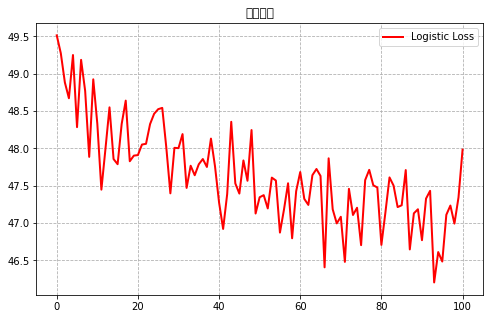

test
test
test
total_test_accuracy: tensor(0.7917, device='cuda:0')
acc_test_each_k: tensor(0.7917, device='cuda:0')
549 92
549 92
total_train_accuracy: tensor(0.8250, device='cuda:0')
Training Epoch: 0, total loss: 47.484307
total_train_accuracy: tensor(0.8292, device='cuda:0')
Training Epoch: 1, total loss: 47.818538
total_train_accuracy: tensor(0.8167, device='cuda:0')
Training Epoch: 2, total loss: 47.359841
total_train_accuracy: tensor(0.8146, device='cuda:0')
Training Epoch: 3, total loss: 47.773075
total_train_accuracy: tensor(0.8146, device='cuda:0')
Training Epoch: 4, total loss: 47.601230
total_train_accuracy: tensor(0.8188, device='cuda:0')
Training Epoch: 5, total loss: 47.526608
total_train_accuracy: tensor(0.8271, device='cuda:0')
Training Epoch: 6, total loss: 46.863091
total_train_accuracy: tensor(0.8208, device='cuda:0')
Training Epoch: 7, total loss: 47.244616
total_train_accuracy: tensor(0.8271, device='cuda:0')
Training Epoch: 8, total loss: 47.548016
total_train_ac

total_train_accuracy: tensor(0.8458, device='cuda:0')
Training Epoch: 85, total loss: 46.788273
total_train_accuracy: tensor(0.8396, device='cuda:0')
Training Epoch: 86, total loss: 46.926640
total_train_accuracy: tensor(0.8583, device='cuda:0')
Training Epoch: 87, total loss: 46.284632
total_train_accuracy: tensor(0.8667, device='cuda:0')
Training Epoch: 88, total loss: 45.870380
total_train_accuracy: tensor(0.8375, device='cuda:0')
Training Epoch: 89, total loss: 46.717266
total_train_accuracy: tensor(0.8625, device='cuda:0')
Training Epoch: 90, total loss: 46.299389
total_train_accuracy: tensor(0.8354, device='cuda:0')
Training Epoch: 91, total loss: 46.689581
total_train_accuracy: tensor(0.8708, device='cuda:0')
Training Epoch: 92, total loss: 46.123163
total_train_accuracy: tensor(0.8542, device='cuda:0')
Training Epoch: 93, total loss: 46.380094
total_train_accuracy: tensor(0.8167, device='cuda:0')
Training Epoch: 94, total loss: 47.327776
total_train_accuracy: tensor(0.8688, dev

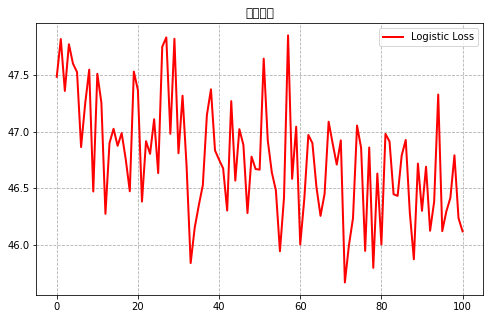

test
test
test
total_test_accuracy: tensor(0.9375, device='cuda:0')
acc_test_each_k: tensor(0.9375, device='cuda:0')
549 92
549 92
total_train_accuracy: tensor(0.8292, device='cuda:0')
Training Epoch: 0, total loss: 47.024249
total_train_accuracy: tensor(0.8354, device='cuda:0')
Training Epoch: 1, total loss: 46.834427
total_train_accuracy: tensor(0.8333, device='cuda:0')
Training Epoch: 2, total loss: 47.191389
total_train_accuracy: tensor(0.8375, device='cuda:0')
Training Epoch: 3, total loss: 46.694572
total_train_accuracy: tensor(0.8625, device='cuda:0')
Training Epoch: 4, total loss: 46.400219
total_train_accuracy: tensor(0.8583, device='cuda:0')
Training Epoch: 5, total loss: 46.411131
total_train_accuracy: tensor(0.8708, device='cuda:0')
Training Epoch: 6, total loss: 46.003042
total_train_accuracy: tensor(0.8854, device='cuda:0')
Training Epoch: 7, total loss: 45.838790
total_train_accuracy: tensor(0.8250, device='cuda:0')
Training Epoch: 8, total loss: 47.044456
total_train_ac

total_train_accuracy: tensor(0.8938, device='cuda:0')
Training Epoch: 85, total loss: 45.302311
total_train_accuracy: tensor(0.8625, device='cuda:0')
Training Epoch: 86, total loss: 46.023448
total_train_accuracy: tensor(0.8729, device='cuda:0')
Training Epoch: 87, total loss: 45.708303
total_train_accuracy: tensor(0.8854, device='cuda:0')
Training Epoch: 88, total loss: 45.294559
total_train_accuracy: tensor(0.8396, device='cuda:0')
Training Epoch: 89, total loss: 46.315100
total_train_accuracy: tensor(0.8688, device='cuda:0')
Training Epoch: 90, total loss: 46.081080
total_train_accuracy: tensor(0.8771, device='cuda:0')
Training Epoch: 91, total loss: 45.707030
total_train_accuracy: tensor(0.8854, device='cuda:0')
Training Epoch: 92, total loss: 45.596291
total_train_accuracy: tensor(0.8688, device='cuda:0')
Training Epoch: 93, total loss: 45.757246
total_train_accuracy: tensor(0.8708, device='cuda:0')
Training Epoch: 94, total loss: 45.793056
total_train_accuracy: tensor(0.8500, dev

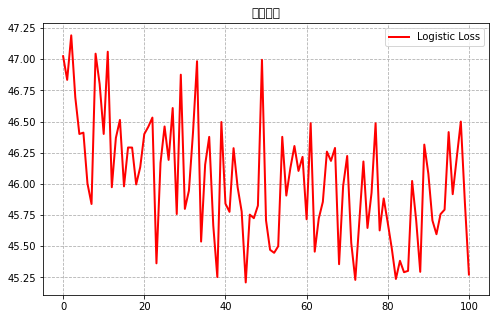

test
test
test
total_test_accuracy: tensor(0.9375, device='cuda:0')
acc_test_each_k: tensor(0.9375, device='cuda:0')
549 92
549 92
total_train_accuracy: tensor(0.8583, device='cuda:0')
Training Epoch: 0, total loss: 46.165493
total_train_accuracy: tensor(0.8354, device='cuda:0')
Training Epoch: 1, total loss: 46.681005
total_train_accuracy: tensor(0.8667, device='cuda:0')
Training Epoch: 2, total loss: 45.971378
total_train_accuracy: tensor(0.8542, device='cuda:0')
Training Epoch: 3, total loss: 46.339122
total_train_accuracy: tensor(0.8854, device='cuda:0')
Training Epoch: 4, total loss: 45.772710
total_train_accuracy: tensor(0.8479, device='cuda:0')
Training Epoch: 5, total loss: 46.369487
total_train_accuracy: tensor(0.8729, device='cuda:0')
Training Epoch: 6, total loss: 45.849823
total_train_accuracy: tensor(0.8646, device='cuda:0')
Training Epoch: 7, total loss: 45.942974
total_train_accuracy: tensor(0.8729, device='cuda:0')
Training Epoch: 8, total loss: 45.862826
total_train_ac

total_train_accuracy: tensor(0.8729, device='cuda:0')
Training Epoch: 86, total loss: 45.867283
total_train_accuracy: tensor(0.8813, device='cuda:0')
Training Epoch: 87, total loss: 45.675887
total_train_accuracy: tensor(0.8917, device='cuda:0')
Training Epoch: 88, total loss: 45.565584
total_train_accuracy: tensor(0.8604, device='cuda:0')
Training Epoch: 89, total loss: 45.592925
total_train_accuracy: tensor(0.8917, device='cuda:0')
Training Epoch: 90, total loss: 45.362784
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 91, total loss: 45.238130
total_train_accuracy: tensor(0.8646, device='cuda:0')
Training Epoch: 92, total loss: 45.684132
total_train_accuracy: tensor(0.8729, device='cuda:0')
Training Epoch: 93, total loss: 45.640370
total_train_accuracy: tensor(0.8458, device='cuda:0')
Training Epoch: 94, total loss: 46.118820
total_train_accuracy: tensor(0.8792, device='cuda:0')
Training Epoch: 95, total loss: 45.407203
total_train_accuracy: tensor(0.8875, dev

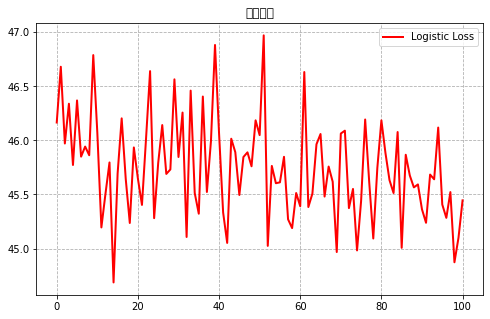

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 92
549 92
total_train_accuracy: tensor(0.8667, device='cuda:0')
Training Epoch: 0, total loss: 45.966301
total_train_accuracy: tensor(0.8958, device='cuda:0')
Training Epoch: 1, total loss: 45.274881
total_train_accuracy: tensor(0.8708, device='cuda:0')
Training Epoch: 2, total loss: 46.005954
total_train_accuracy: tensor(0.8729, device='cuda:0')
Training Epoch: 3, total loss: 45.820474
total_train_accuracy: tensor(0.8604, device='cuda:0')
Training Epoch: 4, total loss: 45.941869
total_train_accuracy: tensor(0.8604, device='cuda:0')
Training Epoch: 5, total loss: 45.952266
total_train_accuracy: tensor(0.8750, device='cuda:0')
Training Epoch: 6, total loss: 45.407982
total_train_accuracy: tensor(0.8771, device='cuda:0')
Training Epoch: 7, total loss: 45.658050
total_train_accuracy: tensor(0.9083, device='cuda:0')
Training Epoch: 8, total loss: 44.959270
total_train_accuracy: 

total_train_accuracy: tensor(0.8896, device='cuda:0')
Training Epoch: 85, total loss: 45.178852
total_train_accuracy: tensor(0.8771, device='cuda:0')
Training Epoch: 86, total loss: 45.762340
total_train_accuracy: tensor(0.8854, device='cuda:0')
Training Epoch: 87, total loss: 44.864413
total_train_accuracy: tensor(0.8813, device='cuda:0')
Training Epoch: 88, total loss: 45.292308
total_train_accuracy: tensor(0.8938, device='cuda:0')
Training Epoch: 89, total loss: 44.726313
total_train_accuracy: tensor(0.8958, device='cuda:0')
Training Epoch: 90, total loss: 44.897057
total_train_accuracy: tensor(0.8958, device='cuda:0')
Training Epoch: 91, total loss: 44.925801
total_train_accuracy: tensor(0.8875, device='cuda:0')
Training Epoch: 92, total loss: 45.465039
total_train_accuracy: tensor(0.8875, device='cuda:0')
Training Epoch: 93, total loss: 45.124146
total_train_accuracy: tensor(0.8667, device='cuda:0')
Training Epoch: 94, total loss: 45.690470
total_train_accuracy: tensor(0.9063, dev

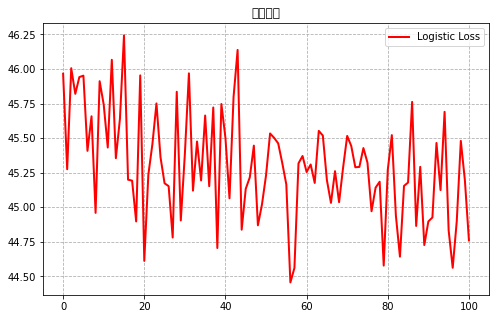

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 92
549 92
total_train_accuracy: tensor(0.9042, device='cuda:0')
Training Epoch: 0, total loss: 44.980600
total_train_accuracy: tensor(0.8896, device='cuda:0')
Training Epoch: 1, total loss: 45.264059
total_train_accuracy: tensor(0.8813, device='cuda:0')
Training Epoch: 2, total loss: 45.473104
total_train_accuracy: tensor(0.9021, device='cuda:0')
Training Epoch: 3, total loss: 44.958016
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 4, total loss: 44.852956
total_train_accuracy: tensor(0.9042, device='cuda:0')
Training Epoch: 5, total loss: 44.588103
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 6, total loss: 44.913706
total_train_accuracy: tensor(0.8854, device='cuda:0')
Training Epoch: 7, total loss: 45.237711
total_train_accuracy: tensor(0.8896, device='cuda:0')
Training Epoch: 8, total loss: 44.943894
total_train_ac

total_train_accuracy: tensor(0.8958, device='cuda:0')
Training Epoch: 85, total loss: 45.035858
total_train_accuracy: tensor(0.8688, device='cuda:0')
Training Epoch: 86, total loss: 45.887066
total_train_accuracy: tensor(0.8958, device='cuda:0')
Training Epoch: 87, total loss: 44.702477
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 88, total loss: 44.849135
total_train_accuracy: tensor(0.8292, device='cuda:0')
Training Epoch: 89, total loss: 46.211740
total_train_accuracy: tensor(0.8917, device='cuda:0')
Training Epoch: 90, total loss: 44.963794
total_train_accuracy: tensor(0.9021, device='cuda:0')
Training Epoch: 91, total loss: 44.798218
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 92, total loss: 44.272902
total_train_accuracy: tensor(0.8833, device='cuda:0')
Training Epoch: 93, total loss: 45.329849
total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 94, total loss: 44.596304
total_train_accuracy: tensor(0.8833, dev

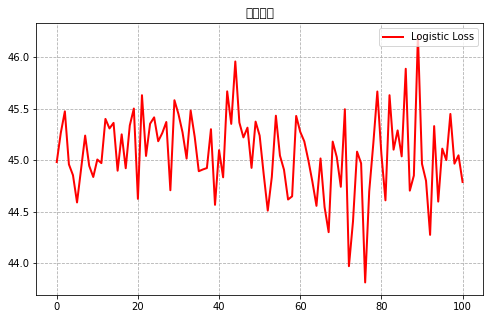

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 92
549 92
total_train_accuracy: tensor(0.9021, device='cuda:0')
Training Epoch: 0, total loss: 45.117456
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 1, total loss: 44.867024
total_train_accuracy: tensor(0.9000, device='cuda:0')
Training Epoch: 2, total loss: 44.616308
total_train_accuracy: tensor(0.8917, device='cuda:0')
Training Epoch: 3, total loss: 45.074949
total_train_accuracy: tensor(0.8729, device='cuda:0')
Training Epoch: 4, total loss: 45.470730
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 5, total loss: 44.842321
total_train_accuracy: tensor(0.8688, device='cuda:0')
Training Epoch: 6, total loss: 45.493202
total_train_accuracy: tensor(0.8813, device='cuda:0')
Training Epoch: 7, total loss: 45.283995
total_train_accuracy: tensor(0.8917, device='cuda:0')
Training Epoch: 8, total loss: 45.149558
total_train_accuracy: 

total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 85, total loss: 44.858484
total_train_accuracy: tensor(0.8833, device='cuda:0')
Training Epoch: 86, total loss: 45.202541
total_train_accuracy: tensor(0.9083, device='cuda:0')
Training Epoch: 87, total loss: 44.575899
total_train_accuracy: tensor(0.9000, device='cuda:0')
Training Epoch: 88, total loss: 44.707005
total_train_accuracy: tensor(0.8917, device='cuda:0')
Training Epoch: 89, total loss: 45.173170
total_train_accuracy: tensor(0.8750, device='cuda:0')
Training Epoch: 90, total loss: 45.334086
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 91, total loss: 44.853613
total_train_accuracy: tensor(0.8938, device='cuda:0')
Training Epoch: 92, total loss: 44.839190
total_train_accuracy: tensor(0.8521, device='cuda:0')
Training Epoch: 93, total loss: 45.820915
total_train_accuracy: tensor(0.8667, device='cuda:0')
Training Epoch: 94, total loss: 45.778903
total_train_accuracy: tensor(0.9042, dev

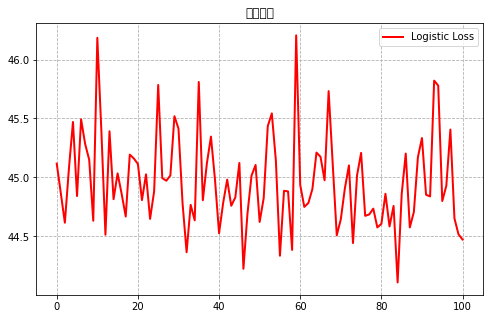

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 92
549 92
total_train_accuracy: tensor(0.8750, device='cuda:0')
Training Epoch: 0, total loss: 45.313956
total_train_accuracy: tensor(0.8875, device='cuda:0')
Training Epoch: 1, total loss: 44.994735
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 2, total loss: 44.516531
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 3, total loss: 44.779371
total_train_accuracy: tensor(0.8958, device='cuda:0')
Training Epoch: 4, total loss: 44.988414
total_train_accuracy: tensor(0.8875, device='cuda:0')
Training Epoch: 5, total loss: 45.263909
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 6, total loss: 44.658652
total_train_accuracy: tensor(0.8896, device='cuda:0')
Training Epoch: 7, total loss: 44.850588
total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 8, total loss: 44.459506
total_train_ac

total_train_accuracy: tensor(0.8875, device='cuda:0')
Training Epoch: 85, total loss: 45.136472
total_train_accuracy: tensor(0.9021, device='cuda:0')
Training Epoch: 86, total loss: 44.692464
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 87, total loss: 44.022288
total_train_accuracy: tensor(0.9021, device='cuda:0')
Training Epoch: 88, total loss: 44.570140
total_train_accuracy: tensor(0.8938, device='cuda:0')
Training Epoch: 89, total loss: 44.790978
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 90, total loss: 44.065566
total_train_accuracy: tensor(0.9083, device='cuda:0')
Training Epoch: 91, total loss: 44.556917
total_train_accuracy: tensor(0.9083, device='cuda:0')
Training Epoch: 92, total loss: 44.429357
total_train_accuracy: tensor(0.9000, device='cuda:0')
Training Epoch: 93, total loss: 44.605628
total_train_accuracy: tensor(0.8917, device='cuda:0')
Training Epoch: 94, total loss: 44.802521
total_train_accuracy: tensor(0.9104, dev

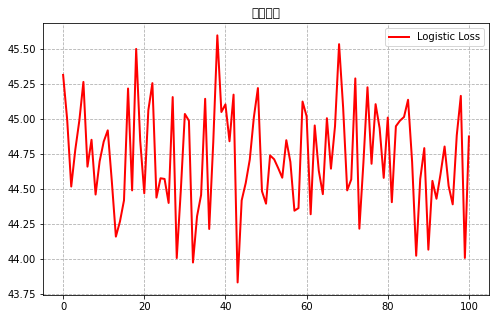

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.6250, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.625, dtype=float32), array(0.7916667, dtype=float32), array(0.7916667, dtype=float32), array(0.9375, dtype=float32), array(0.9375, dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(0.9583334, dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.9020833


In [7]:
#train model with new features of 94
model=model2
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/max_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/max_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/max/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP2(
  (bn0): BatchNorm1d(91, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=91, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 92
f1_score:  %.4f 0.8934851997115499
accuracy_score: 0.8913043478260869
recall_score: 0.8968498168498168
pre_recall: 0.9002597467509749
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

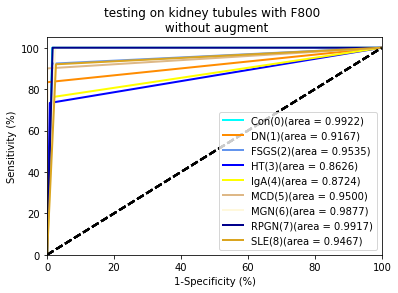

In [8]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/max/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP2()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/max_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('testing on kidney tubules with F800 \n without augment')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 

